In [1]:
import sys, os, glob, h5py
import time, datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import PyMKID_USRP_functions as PUf
import PyMKID_resolution_functions as Prf
import TimestreamHelperFunctions as Thf

In [3]:
## MB Results come from fitting a temperature scan at a specified RF power
MB_fit_vals = np.array([4.24216+9.75e-6, 
                        0.177  ,
                        0.0125 ,
                        4.1e7  ]) ## [ F0 [GHz] , Delta , alpha , Qi0 ]

In [ ]:
## 6/07 Al Runs
series_list = np.array([
#     "20220607_095300" , 
    "20220607_100452" , 
    "20220607_100858" , 
    "20220607_101139" , 
    "20220607_102016" , 
    "20220607_102257" , 
    "20220607_102619" , 
    "20220607_103040" , 
    "20220607_103312" , 
    "20220607_103536" , 
    "20220607_103820" , 
    "20220607_104103" , 
    "20220607_104418" , 
    "20220607_104739" , 
#     "20220607_105011" 
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_min, stop=P_max+P_step, step=P_step)[1:-1]

In [ ]:
## 6/19 Al Runs
series_list = np.array([
    "20220619_155709",
    "20220619_153053",
    "20220619_152817",
    "20220619_152542",
    "20220619_152210",
    "20220619_151914",
#     "20220619_151634",
#     "20220619_151405",
#     "20220619_150933",
#     "20220619_150645",
#     "20220619_150415",
#     "20220619_150117",
#     "20220619_145802",
#     "20220619_145536",
#     "20220619_145204"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[:6]#[3:-1]

In [ ]:
## 6/19 Nb7 Runs
series_list = np.array([
#     "20220619_171322",
#     "20220619_171119",
#     "20220619_170714",
    "20220619_170214",
    "20220619_170017",
    "20220619_165127",
    "20220619_164921",
    "20220619_164721",
    "20220619_164257",
    "20220619_164056",
    "20220619_162829",
    "20220619_162632",
    "20220619_161836",
    "20220619_161640",
    "20220619_160446"
])

P_min = -70 ; P_max = 0 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)[3:]

In [ ]:
## 6/30 Al Runs - Shield Open, No Laser
series_list = np.array([
    "20220630_090941",
    "20220630_090827",
    "20220630_090713",
    "20220630_090559",
    "20220630_090445",
    "20220630_090331",
    "20220630_090217",
    "20220630_090103",
    "20220630_085949",
    "20220630_085835",
    "20220630_085721",
    "20220630_085600"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [ ]:
## 6/30 Al Runs - Shield Closed, No Laser, people in clean room
series_list = np.array([
    "20220630_120041",
    "20220630_115927",
    "20220630_115813",
    "20220630_115659",
    "20220630_115545",
    "20220630_115431",
    "20220630_115317",
    "20220630_115203",
    "20220630_115049",
    "20220630_114935",
    "20220630_114821",
    "20220630_114700"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [4]:
## 6/30 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220630_155428",
    "20220630_155320",
    "20220630_155212",
    "20220630_155104",
    "20220630_154956",
    "20220630_154848",
    "20220630_154740",
    "20220630_154632",
    "20220630_154524",
    "20220630_154416",
    "20220630_154308",
    "20220630_154154"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [4]:
## 7/6 Al Runs - Shield Closed, No Laser
series_list = np.array([
    "20220706_164154",
    "20220706_164040",
    "20220706_163926",
    "20220706_163812",
    "20220706_163658",
    "20220706_163544",
    "20220706_163430",
    "20220706_163316",
    "20220706_163202",
    "20220706_163048",
    "20220706_162934",
    "20220706_162814"
])

P_min = -70 ; P_max = -15 ; P_step = 5
powers_list = np.arange(start=P_max, stop=P_min-P_step, step=-P_step)

In [5]:
for i in np.arange(len(series_list)):
    print(series_list[i], ":", powers_list[i], "dBc")

20220706_164154 : -15 dBc
20220706_164040 : -20 dBc
20220706_163926 : -25 dBc
20220706_163812 : -30 dBc
20220706_163658 : -35 dBc
20220706_163544 : -40 dBc
20220706_163430 : -45 dBc
20220706_163316 : -50 dBc
20220706_163202 : -55 dBc
20220706_163048 : -60 dBc
20220706_162934 : -65 dBc
20220706_162814 : -70 dBc


In [ ]:
sum_file, dly_file, vna_file, tone_files = Thf.GetFiles(series_list[2], verbose=True)
metadata, avg_frqs, avg_S21s = Thf.UnpackSummary(sum_file)

In [ ]:
powers, PSDs, res, timestreams = Thf.CleanPSDs(tone_files[0], vna_file, f_transient=0.075,
                                               charFs = avg_frqs,
                                               charZs = avg_S21s,
                                               MBresults = MB_fit_vals)

In [ ]:
PSDs.keys()

In [ ]:
plt.loglog(PSDs['f'],PSDs['kappa_1'])

In [ ]:
del powers, PSDs, res, timestreams

## Now package it all together

Line Delay file:  None
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_164154/USRP_VNA_20220706_164154.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_164154/USRP_Noise_20220706_164154_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_164154/noise_averages_20220706_164154.h5
Will separate data into  1500 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
Will convert to quasiparticle basis!
doing additional decimation
sampling frequency plugged into welch is 50000
saving pulses to /data/USRP_Noise_Scans/20220706/20220706_164154/USRP_Noise_20220706_164154_delta0.h5!
found 8 pulses
chunk length plugged into welch is 500
chunked data into 1500 timestreams
computed electronics basis
cleaning...
(2, 690000)
(1, 690000)
(1, 690000)
(2, 690000)
(1, 690000)
(1, 690000)
0.20702132634474102
0.19044305570724654
num

/home/nexus-admin/NEXUS_RF/AnalysisScripts/PyMKID_resolution_functions.py:862: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(noise_data_file + '_timestream')


Line Delay file:  None
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_163812/USRP_VNA_20220706_163812.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_163812/USRP_Noise_20220706_163812_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_163812/noise_averages_20220706_163812.h5
Will separate data into  1500 chunks to achieve the requested 1.00e+02  Hz low  end of the PSD
Additional decimation by 20 needed to achieve the requested 5.00e+04  Hz high end of the PSD
Will convert to resonator basis!
Will convert to quasiparticle basis!
doing additional decimation
sampling frequency plugged into welch is 50000
saving pulses to /data/USRP_Noise_Scans/20220706/20220706_163812/USRP_Noise_20220706_163812_delta0.h5!
found 2 pulses
chunk length plugged into welch is 500
chunked data into 1500 timestreams
computed electronics basis
cleaning...
(2, 693000)
(1, 693000)
(1, 693000)
(2, 693000)
(1, 693000)
(1, 693000)
0.03408522943497785
0.3600229520821434
numb

doing additional decimation
sampling frequency plugged into welch is 50000
saving pulses to /data/USRP_Noise_Scans/20220706/20220706_162934/USRP_Noise_20220706_162934_delta0.h5!
found 11 pulses
chunk length plugged into welch is 500
chunked data into 1500 timestreams
computed electronics basis
cleaning...
(2, 689000)
(1, 689000)
(1, 689000)
(2, 689000)
(1, 689000)
(1, 689000)
0.0006128208203961315
0.36670491142716344
number of chunks used to average is 1378
Converting to resonator basis!
Converting to quasiparticle basis!
Line Delay file:  /data/USRP_Noise_Scans/20220706/20220706_162814/USRP_Delay_20220706_162814.h5
VNA scan file:    /data/USRP_Noise_Scans/20220706/20220706_162814/USRP_VNA_20220706_162814.h5
Timestream files: ['/data/USRP_Noise_Scans/20220706/20220706_162814/USRP_Noise_20220706_162814_delta0.h5']
Summary file:	 /data/USRP_Noise_Scans/20220706/20220706_162814/noise_averages_20220706_162814.h5
Will separate data into  1500 chunks to achieve the requested 1.00e+02  Hz low

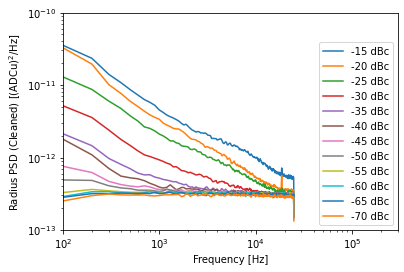

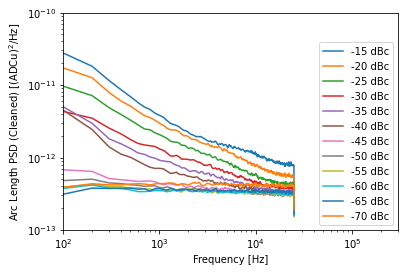

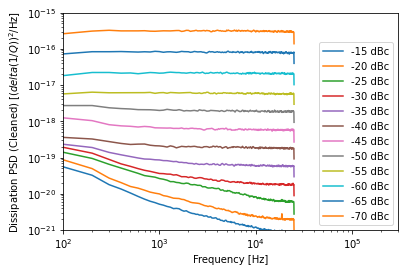

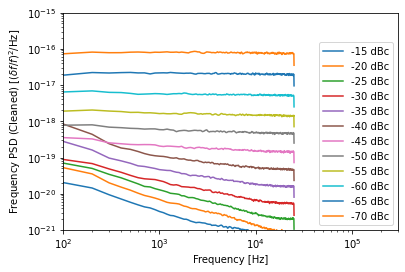

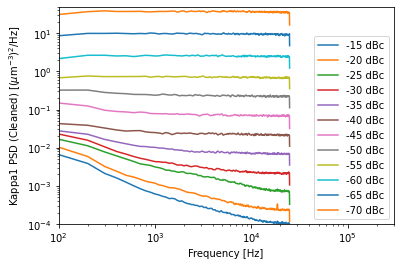

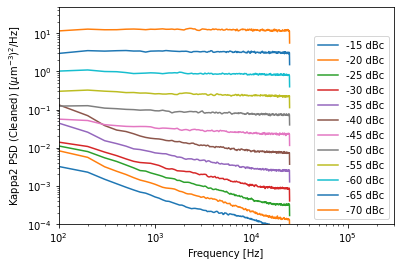

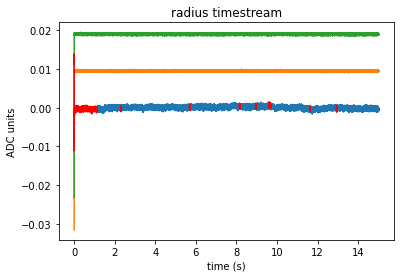

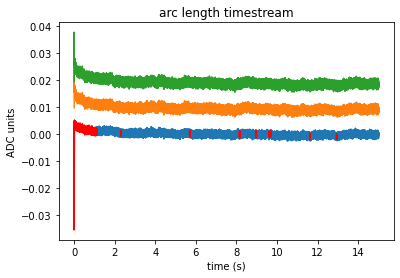

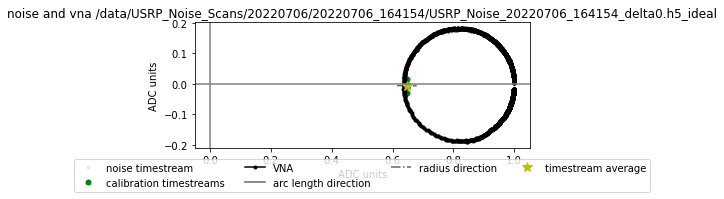

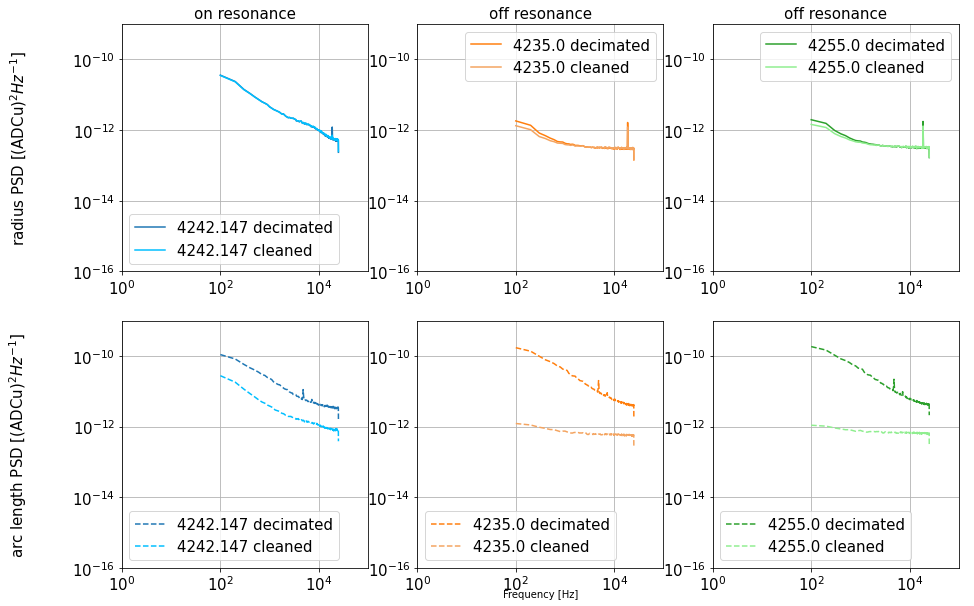

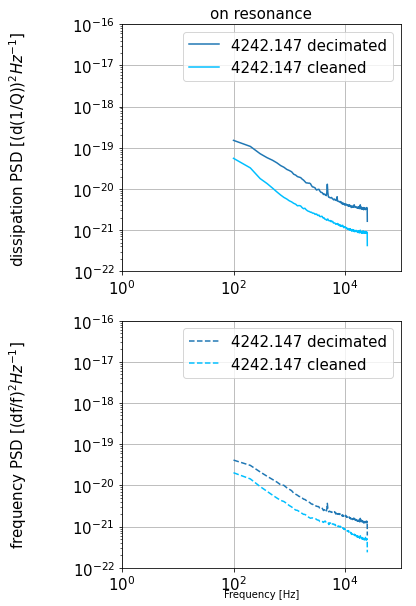

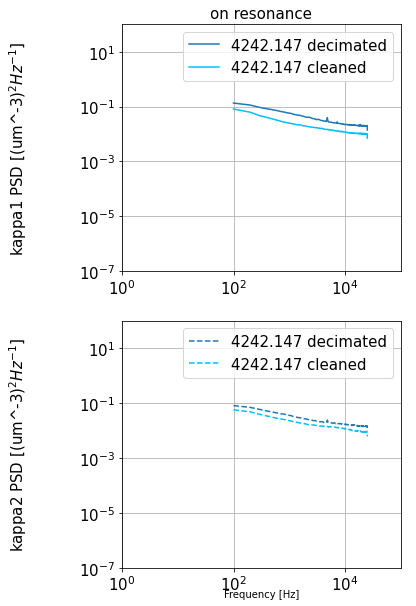

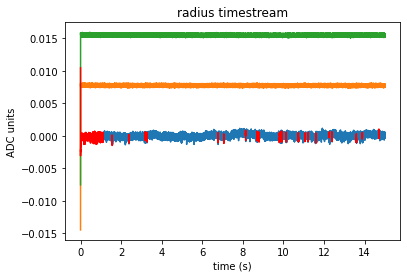

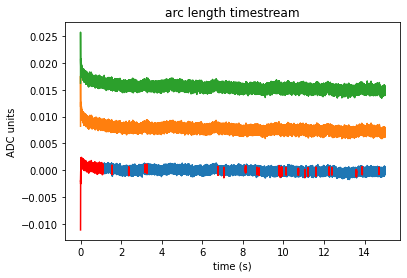

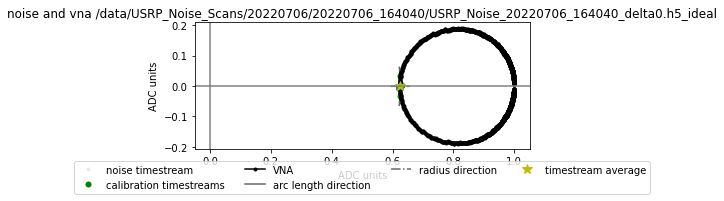

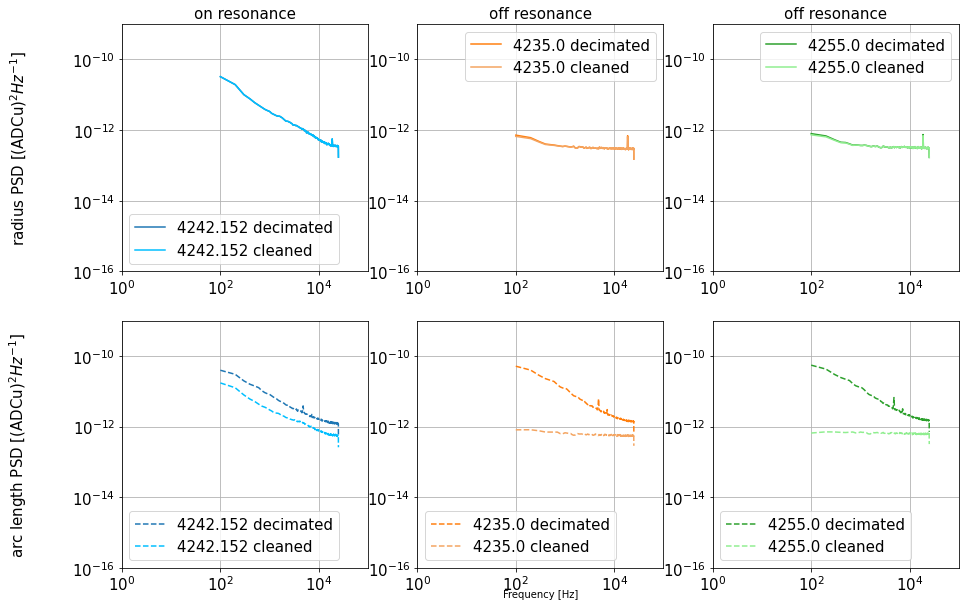

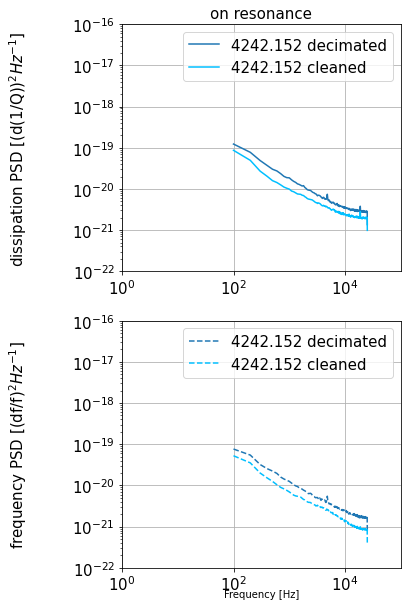

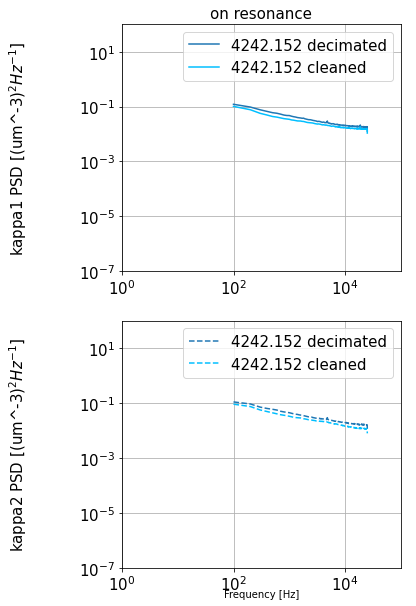

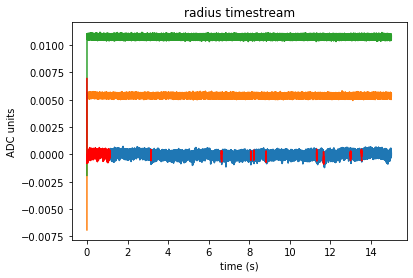

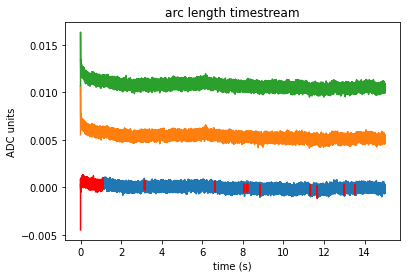

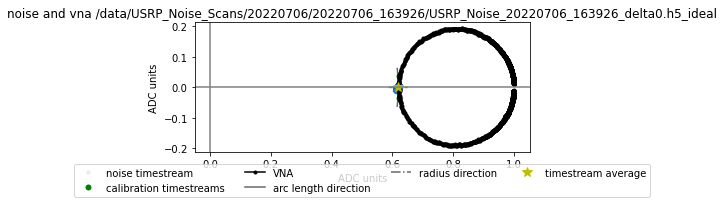

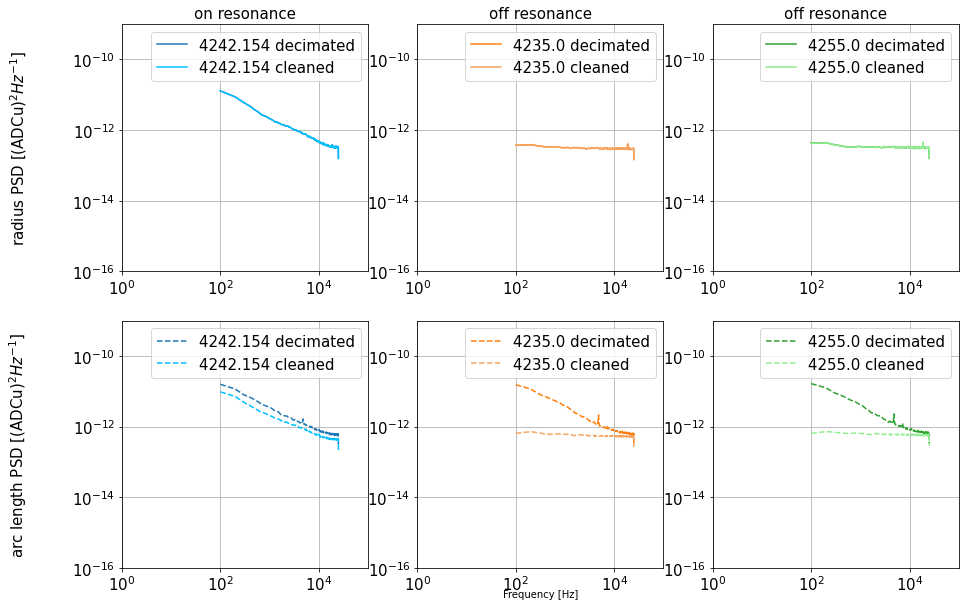

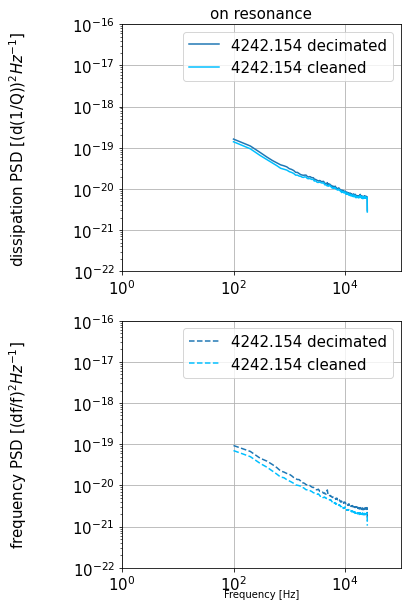

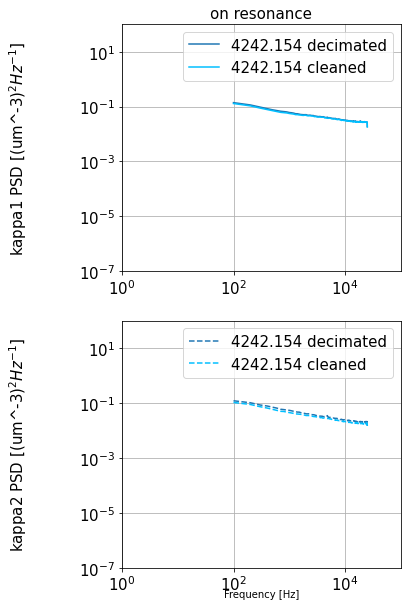

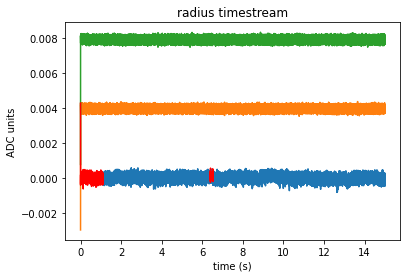

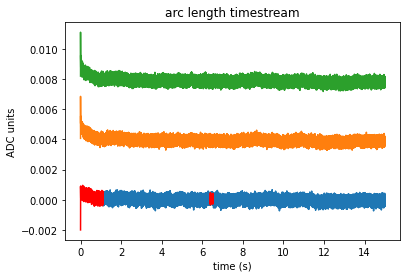

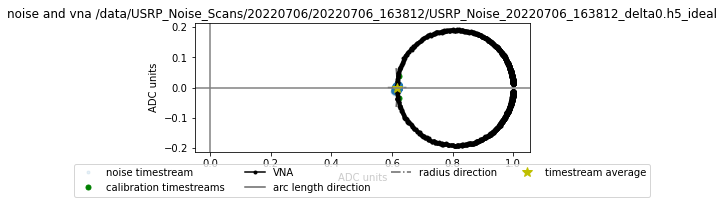

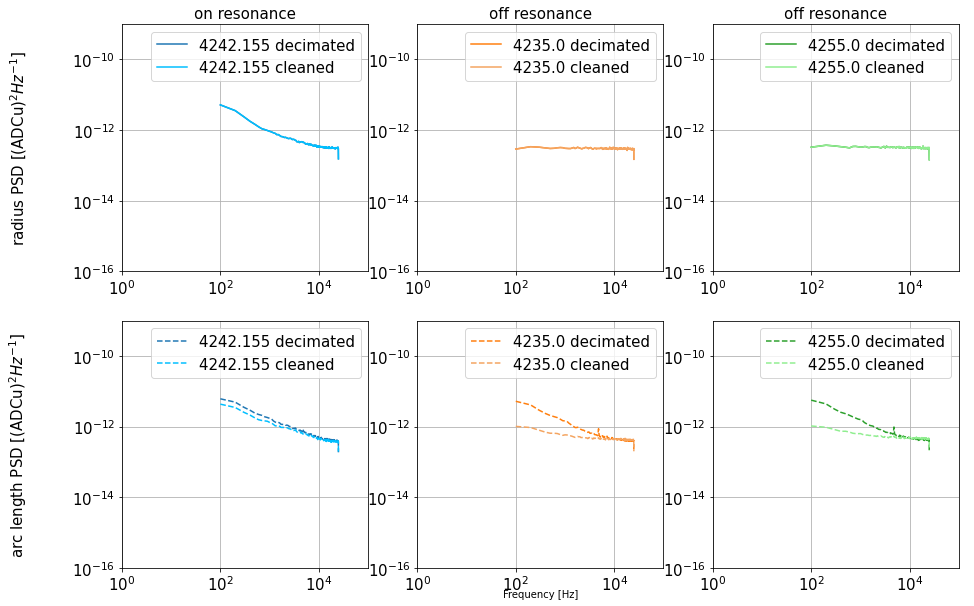

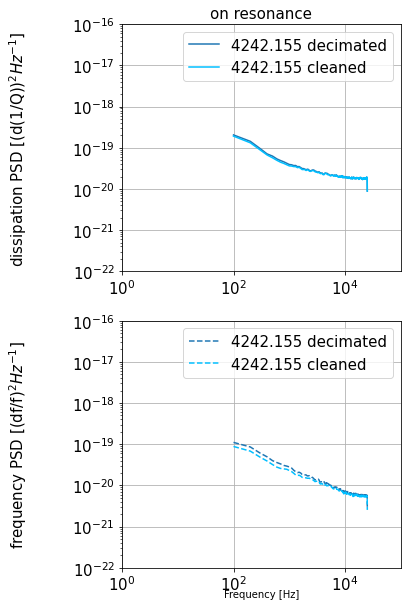

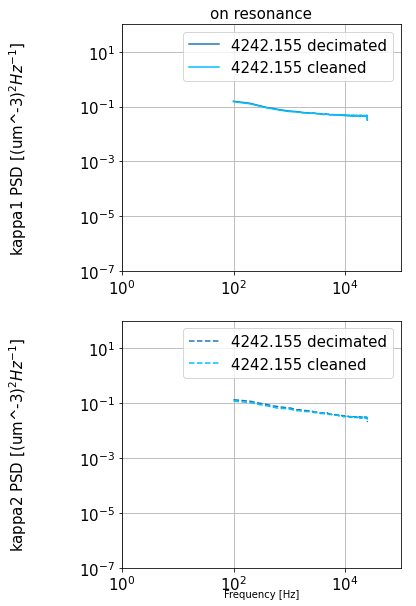

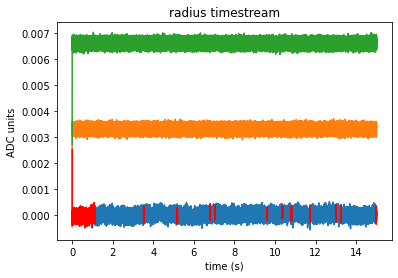

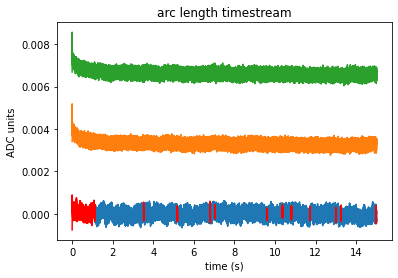

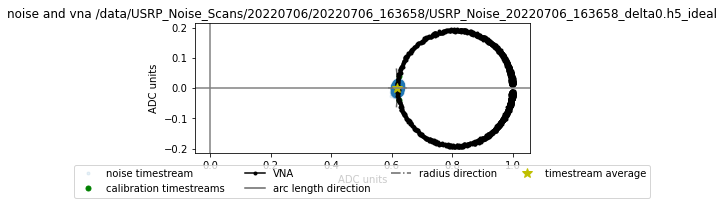

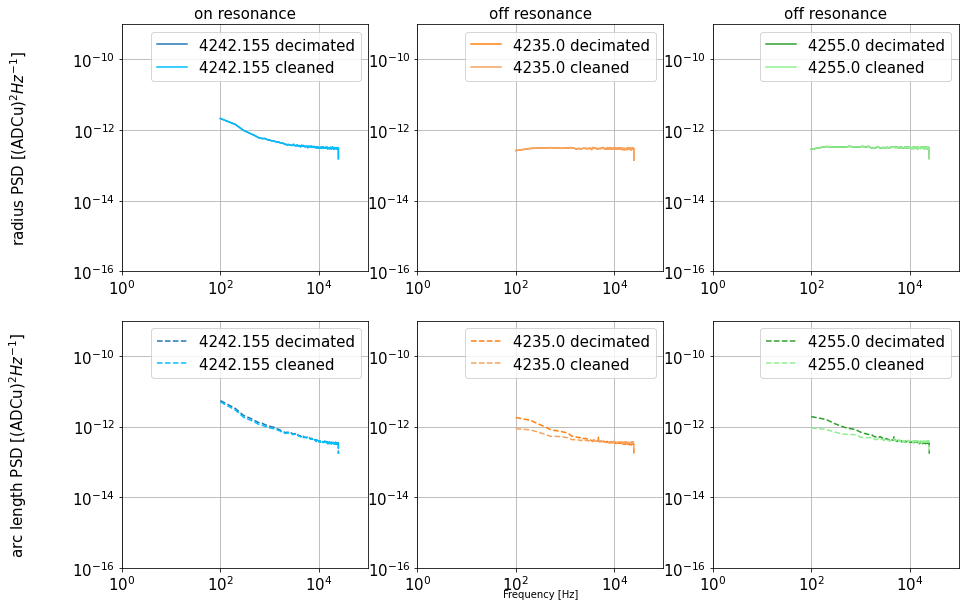

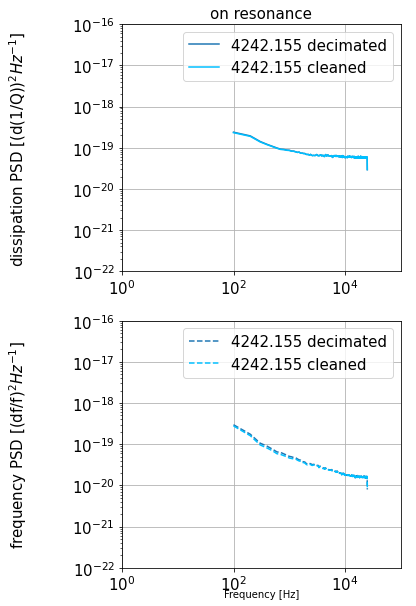

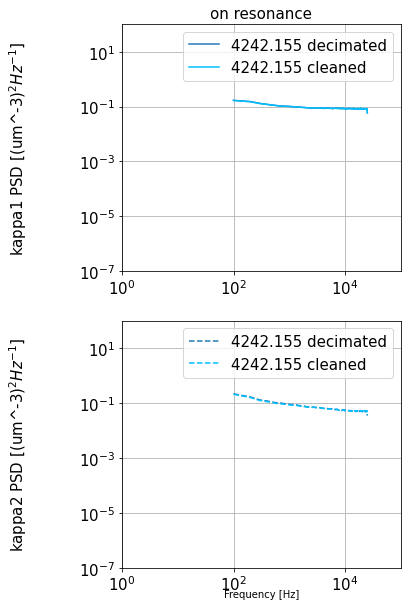

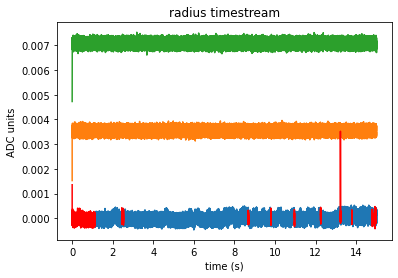

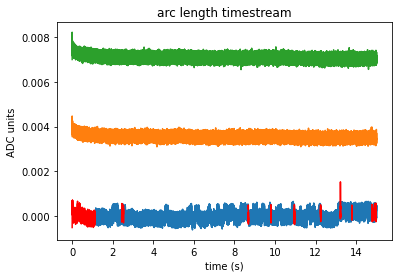

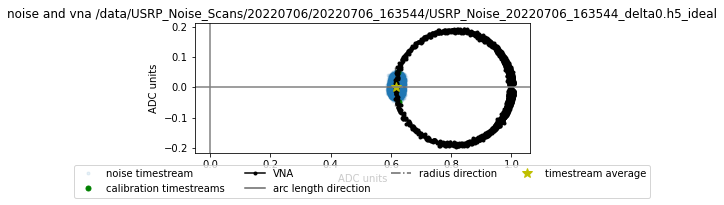

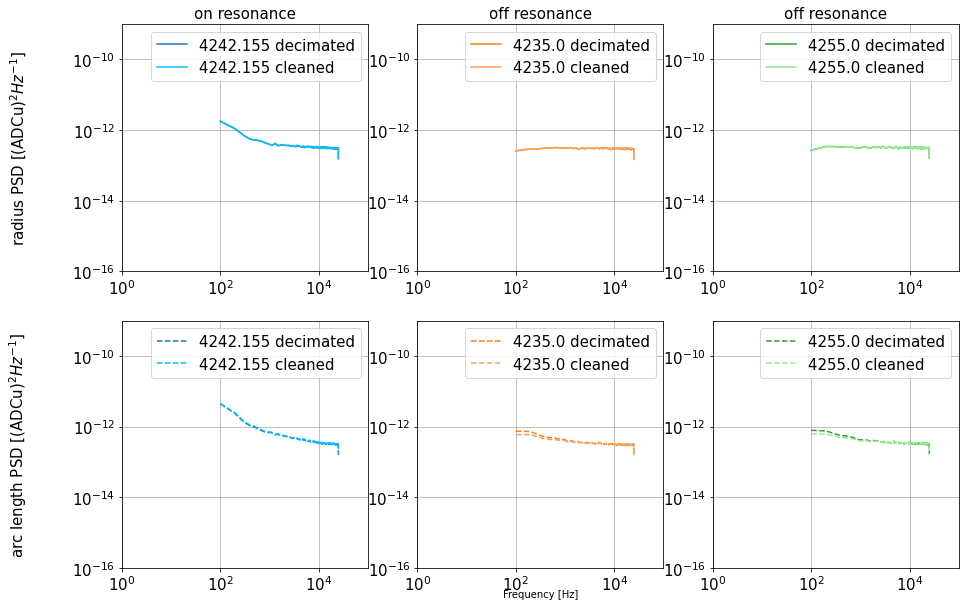

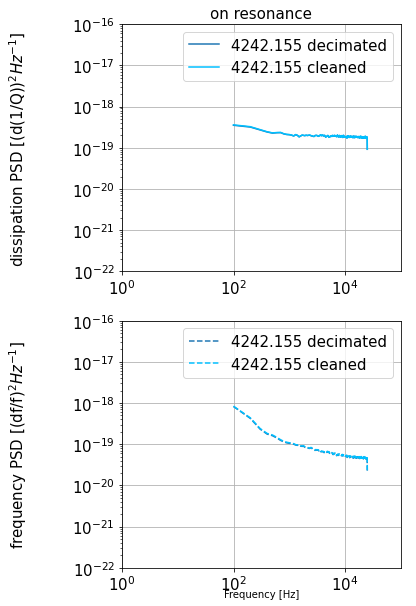

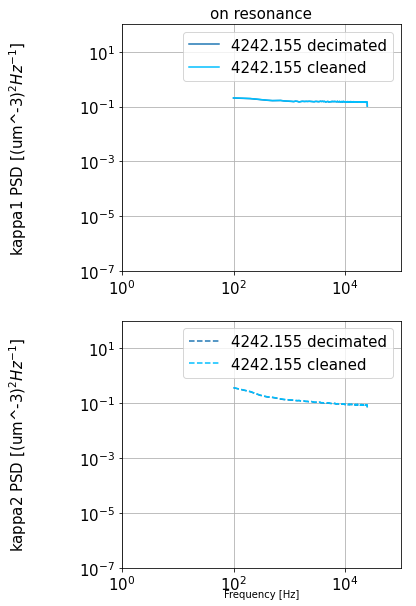

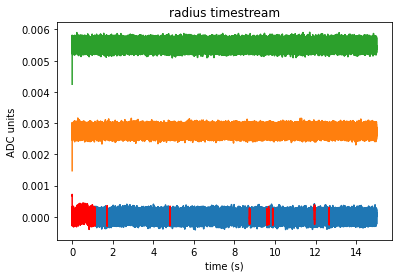

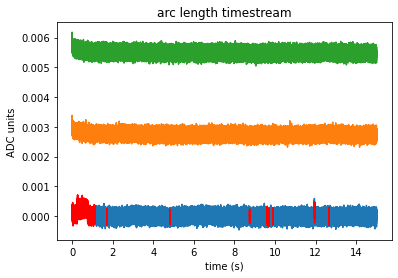

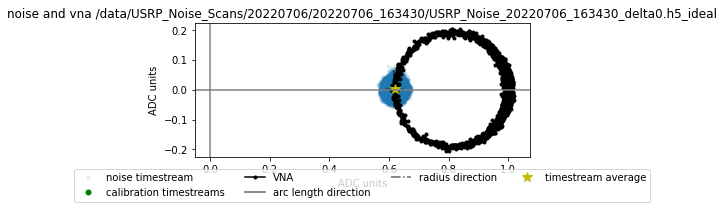

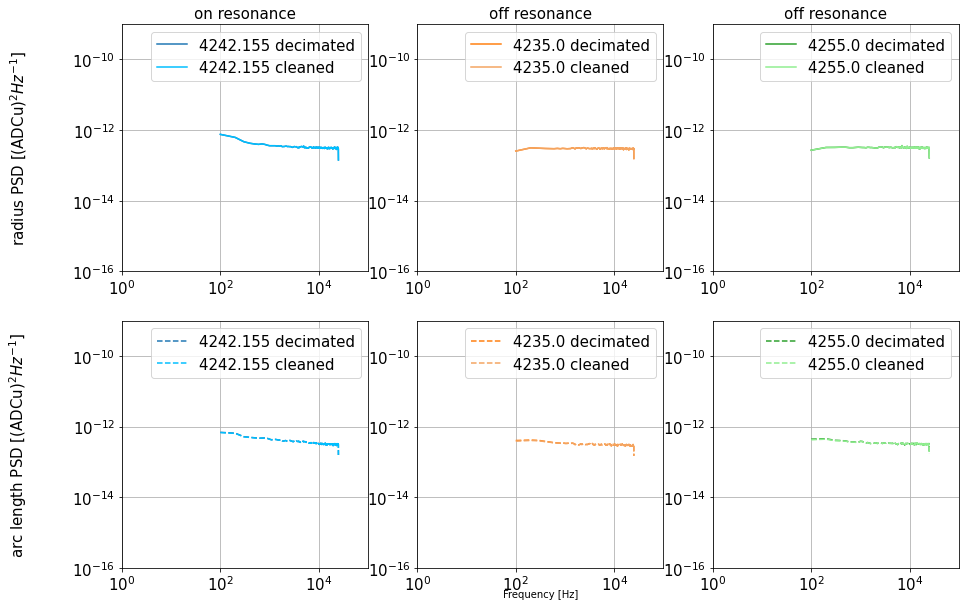

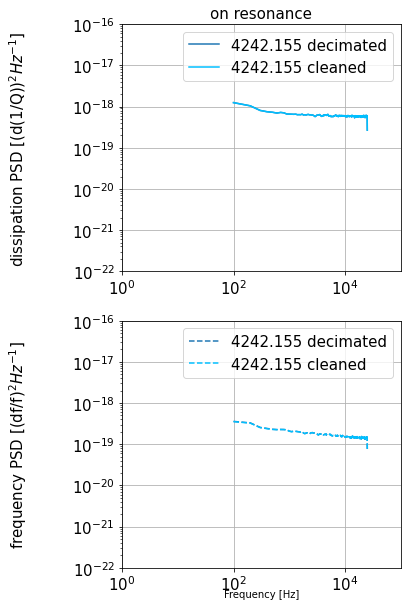

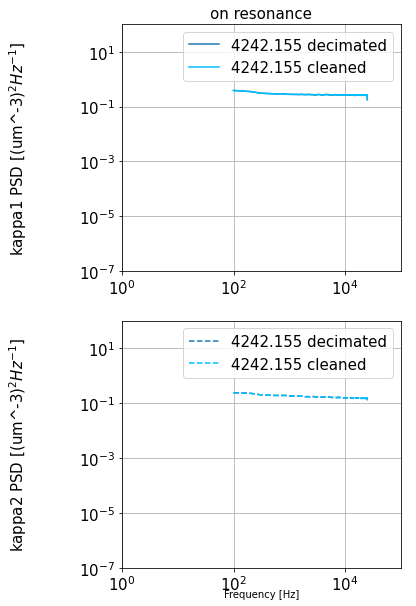

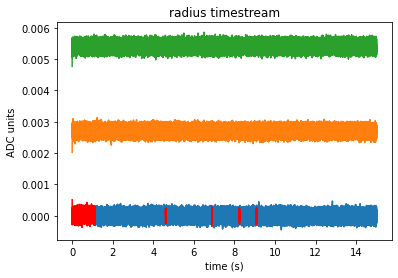

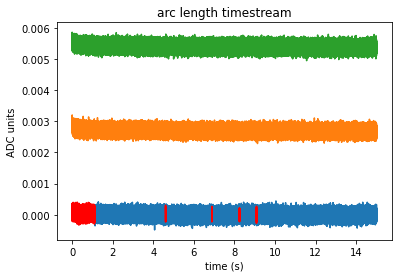

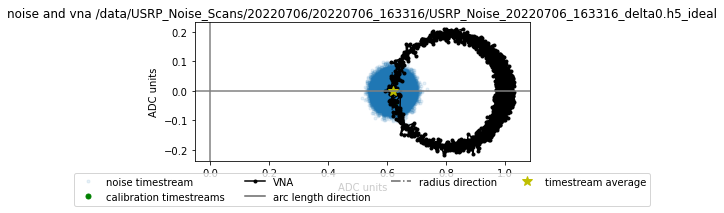

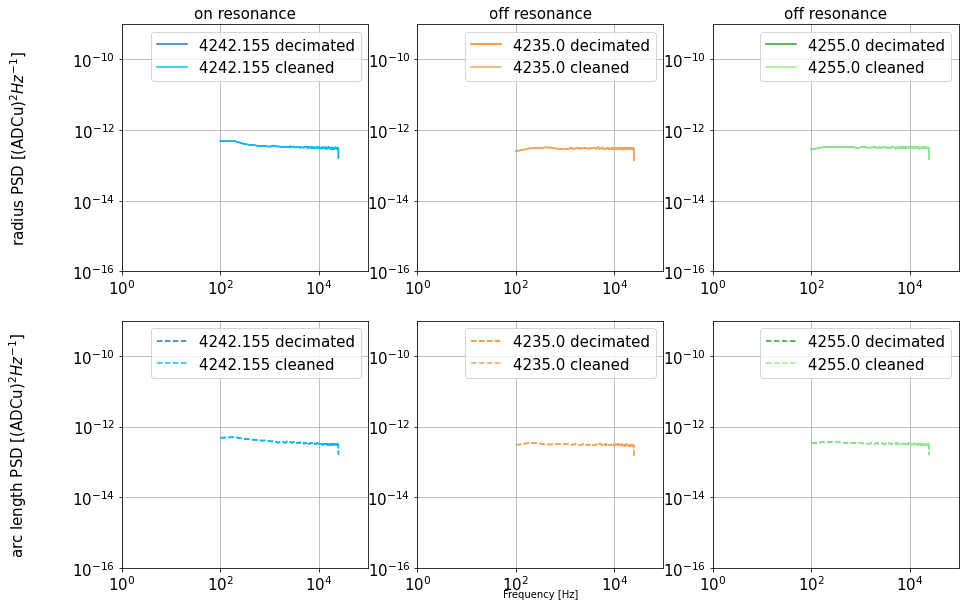

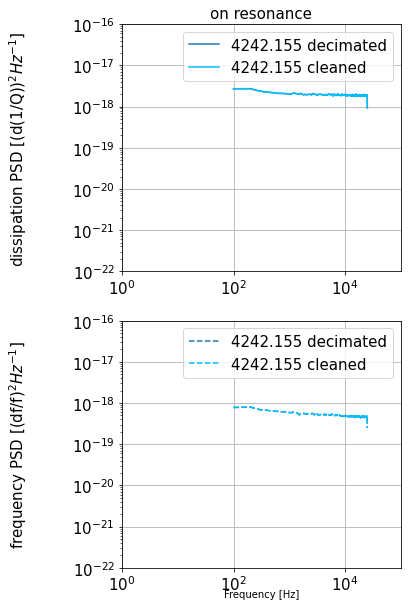

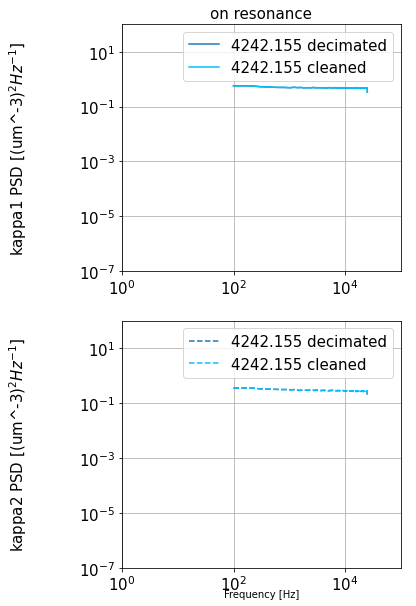

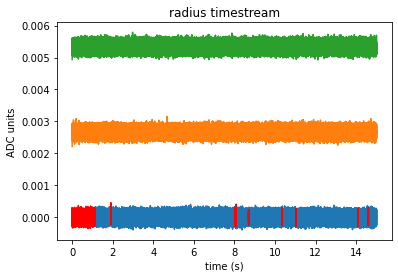

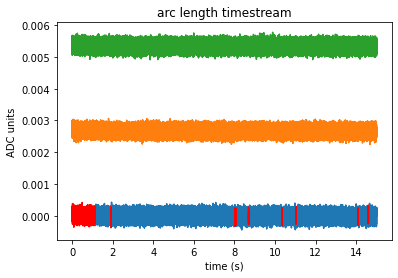

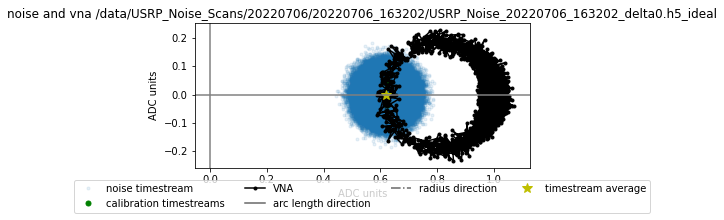

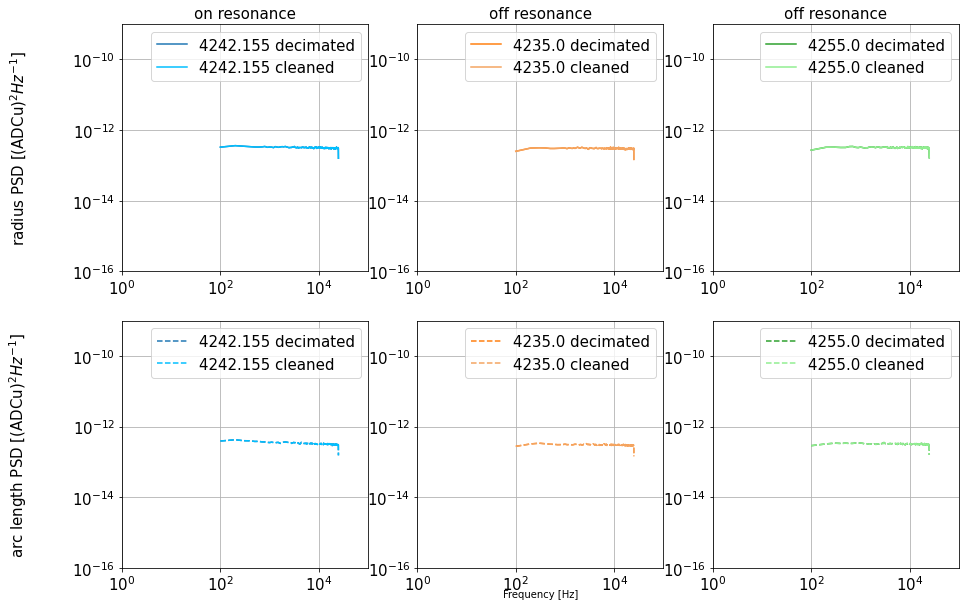

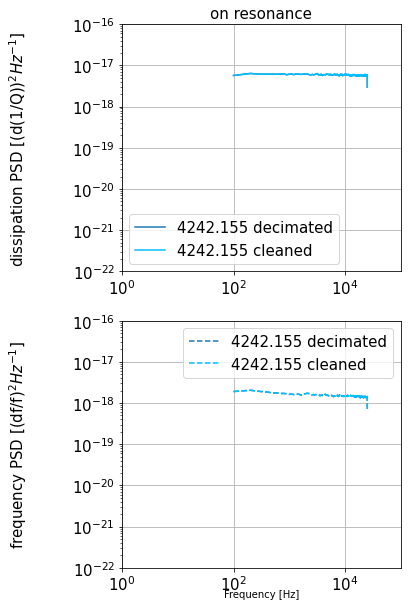

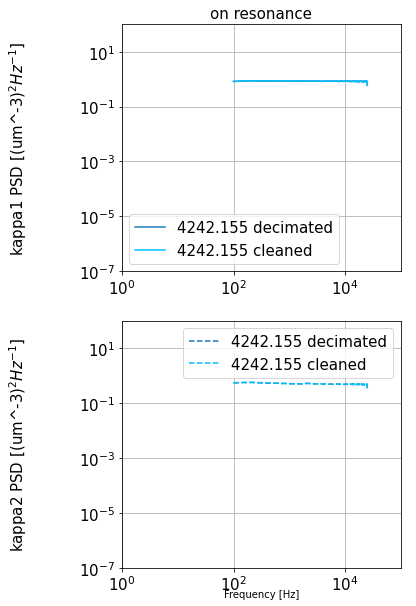

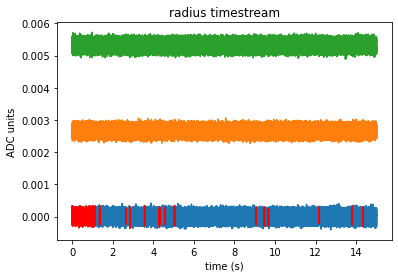

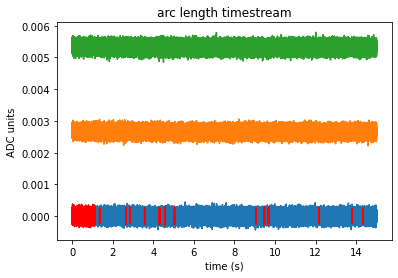

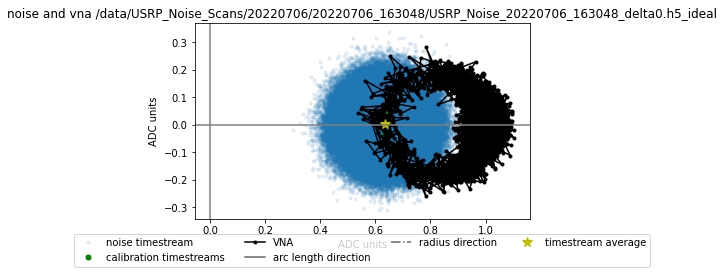

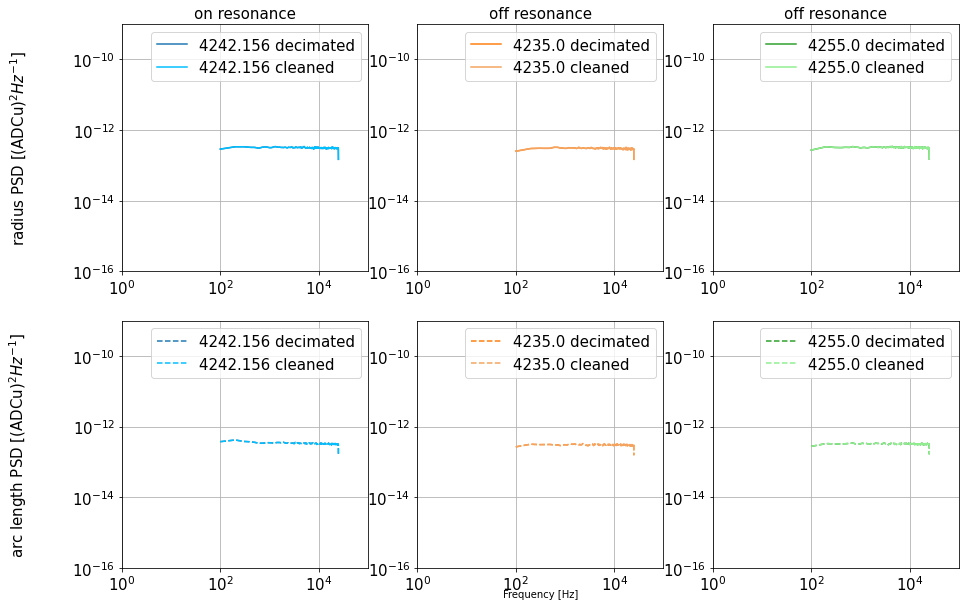

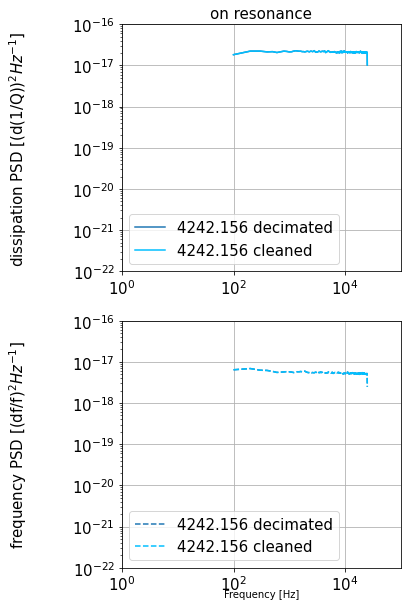

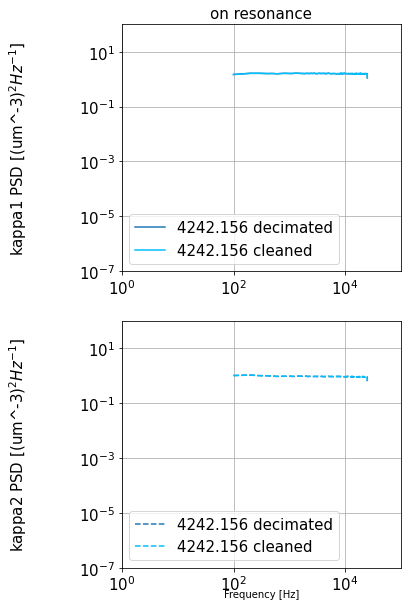

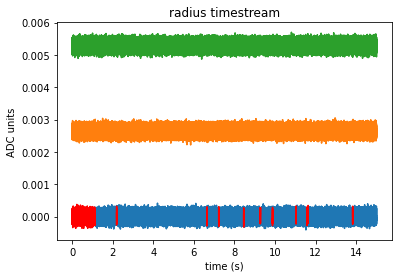

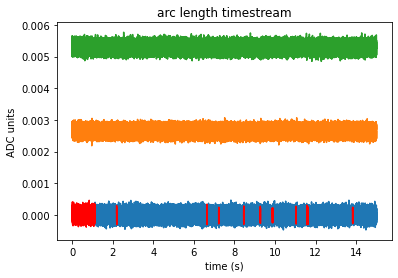

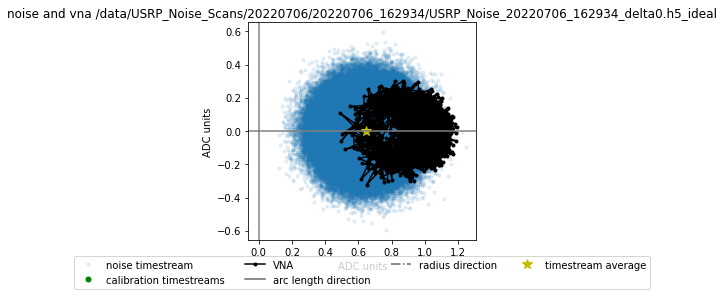

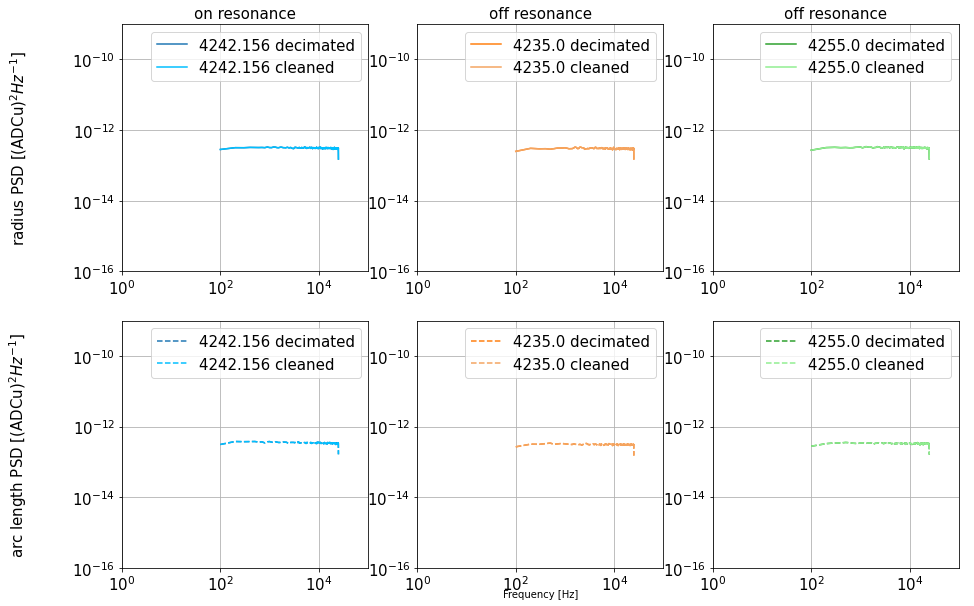

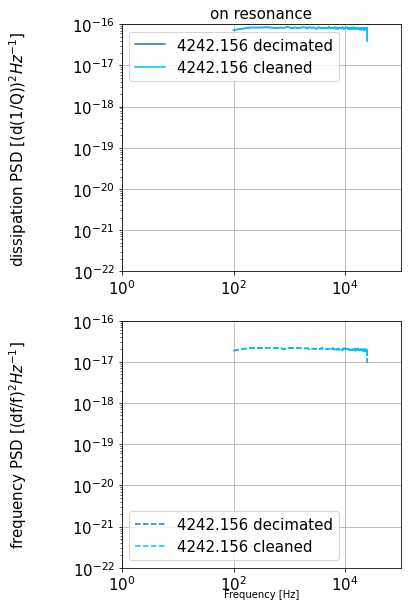

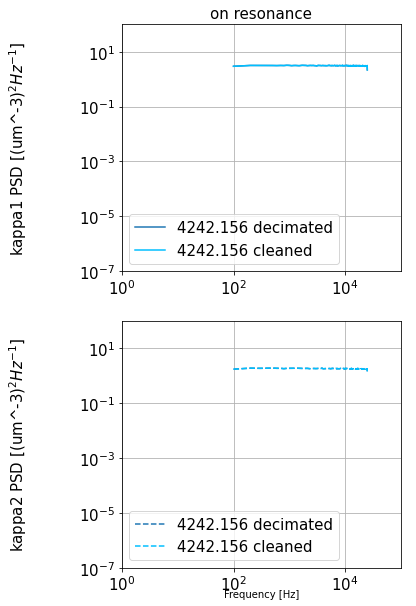

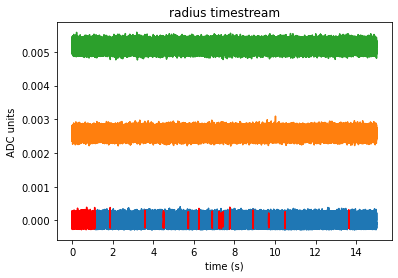

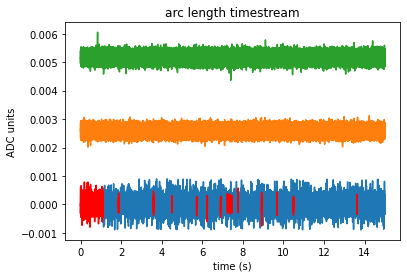

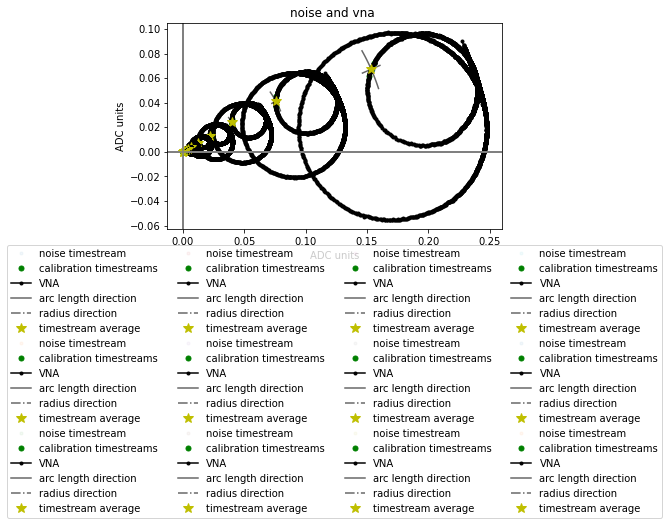

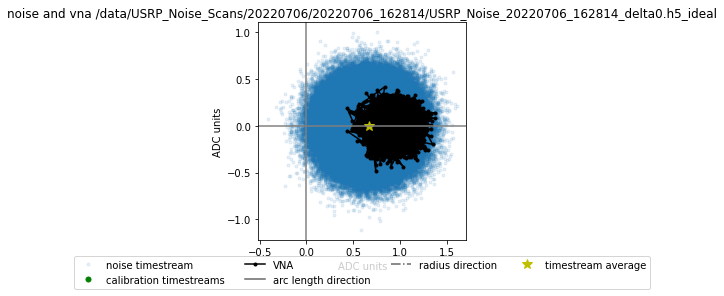

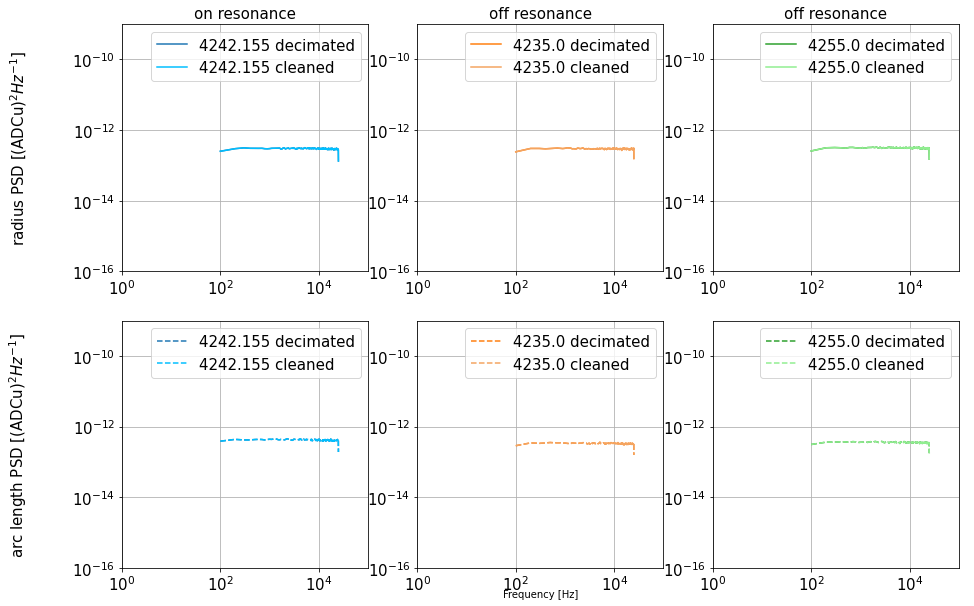

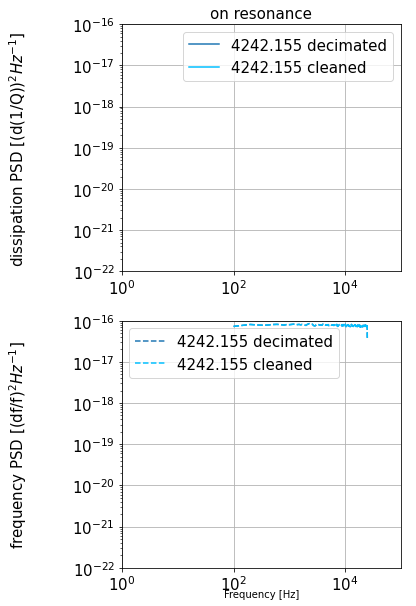

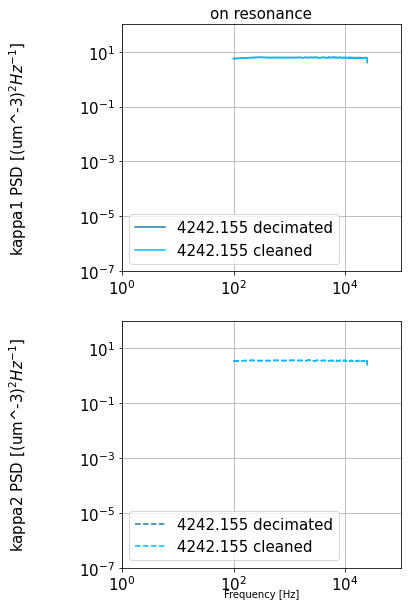

In [6]:
Thf.PlotPSDsByPower(series_list, powers_list, fHz_range = [1e2,3e5], \
	e_b_PSDrange = [1e-13,1e-10], r_b_PSDrange = [1e-21,1e-15], \
	q_b_PSDrange = [1e-4,5e1], MB_fit_result=MB_fit_vals)